<a href="https://colab.research.google.com/github/LinaNontoa/nucleo3-Modelo-de-abandono-de-usuarios-bancarios2/blob/main/Modelo_de_abandono_de_usuarios_bancarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Trabajo realizado por Lina Barreto

In [ ]:
#Notebook para mostrar los diferentes factores que inciden en la deserción de clientes en una entidad bancaria

In [ ]:
# Librerías

In [6]:
import pandas as pd
import numpy as np
from google.colab import files


In [ ]:
# Archivos de datos y funciones

In [18]:
import pandas as pd
import numpy as np


In [ ]:
#Datos

In [19]:
df = pd.read_csv('Churn_Modelling.csv')

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [21]:
df.shape

(10000, 14)

In [22]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [23]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
#valores y  variables categóricas

In [24]:
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['NumOfProducts'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [ ]:
#valores nulos

In [25]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
#Funciones estadísticas:

In [27]:
for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

User uploaded file "Churn_Modelling (2).csv" with length 674857 bytes


In [28]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# variables independientes

In [40]:
final_dataset = df[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]


In [41]:
final_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#variables categóricas

In [42]:
final_dataset = pd.get_dummies(final_dataset, drop_first=True)

In [43]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
corrmat = final_dataset.corr()


In [48]:
top_corr_features = corrmat.index

In [67]:
plt.figure(figsize=(90,90))

<Figure size 9000x9000 with 0 Axes>

<Figure size 9000x9000 with 0 Axes>

In [68]:
import seaborn as sns

<Axes: >

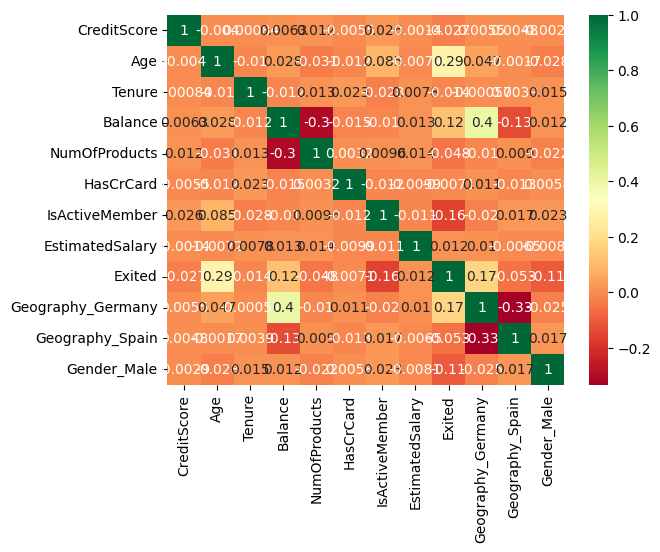

In [69]:
sns.heatmap(final_dataset[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [70]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [ ]:
#variables dependientes e independientes

In [71]:
X = final_dataset.iloc[:, [0,1,2,3,4,5,6,7,9,10,11]]
y = final_dataset.iloc[:, 8].values

In [72]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [ ]:
#Estandarizar el conjunto de datos

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [81]:
print(X_train)

[[ 0.35649971 -0.6557859   0.34567966 ... -0.57946723 -0.57638802
   0.91324755]
 [-0.20389777  0.29493847 -0.3483691  ...  1.72572313 -0.57638802
   0.91324755]
 [-0.96147213 -1.41636539 -0.69539349 ... -0.57946723  1.73494238
   0.91324755]
 ...
 [ 0.86500853 -0.08535128 -1.38944225 ... -0.57946723 -0.57638802
  -1.09499335]
 [ 0.15932282  0.3900109   1.03972843 ... -0.57946723 -0.57638802
   0.91324755]
 [ 0.47065475  1.15059039 -1.38944225 ...  1.72572313 -0.57638802
   0.91324755]]


In [82]:
print(df.shape)
print(df.describe())

(10000, 14)
         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0

In [ ]:
#visualilzación

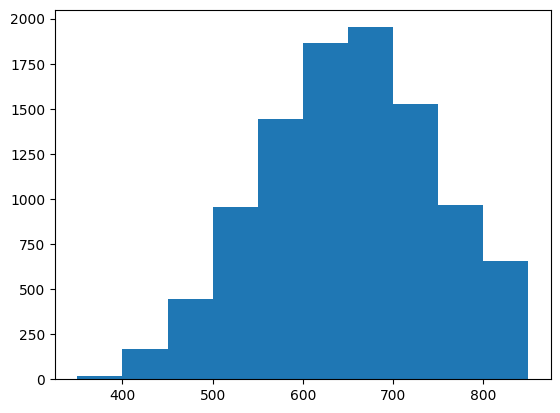

In [83]:
import matplotlib.pyplot as plt
plt.hist(df['CreditScore'])
plt.show()

In [ ]:
#Preparación de datos

In [84]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
#Modelo

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [86]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [89]:
from sklearn.metrics import accuracy_score
pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.8665


In [ ]:
#Conclusiones:

In [ ]:
#Las variables que son mas relevantes para entender la deserción es la edad del cliente, el crédito, balance promedio.

In [ ]:
#El puntaje de crédito  tiene  valores bajos,un puntaje bajo puede estar correlacionado con una mayor probabilidad de deserción.

In [ ]:
#Los datos como la demográfia , edad y  geográfica tienen cierto poder predictivo. Permite entender las  diferencias entre generaciones y  regionales para entender la deserción bancaria.

In [ ]:
#Recursos de apoyo


In [ ]:
#•    Becerril Sánchez, B. & Ayala Brito, G. (2016). Finanzas bursátiles. Instituto Mexicano de Contadores Públicos. https://elibro.net/es/lc/politecnicointernacional/titulos/116387
#•    Martinez Heras, J. (19 de septiembre de 2020). Las 7 Fases del Proceso de Machine Learning. Iartificial. https://www.iartificial.net/fases-del-proceso-de-machine-learning/
#•    Román, V. (18 de febrero de 2019). Machine Learning: Cómo Desarrollar un Modelo desde Cero. Medium. https://medium.com/datos-y-ciencia/machine-learning-c%C3%B3mo-desarrollar-un-modelo-desde-cero-cc17654f0d48
#•    Obtención de data y modelos de machine learning como ejemplo. https://www.kaggle.com/